# MODELING

## Library Import


In [25]:
#Data wrangling
import pandas as pd 
import numpy as np 

#Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt

#Pipeline 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

#Model validation
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

#Preprocessing 
from sklearn.impute import SimpleImputer #imputar dados quando não houverem dados
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler #tratamento de colunas categóricas e numéricas

#Models 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Keep Column Names
from sklearn import set_config
set_config(transform_output='pandas')

#Save model
import pickle

## Raw Data

In [3]:
df = pd.read_csv('../data/customer_churn.csv')
df.head()

,CustomerID,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Value
0,3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,3239,1
1,9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,2701,1
2,9305-CDSKC,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,5372,1
3,7892-POOKP,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,5003,1
4,0280-XJGEX,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,5340,1


**DATA DICTIONARY**

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

## DATA UNDERSTANDING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Latitude           7032 non-null   float64
 2   Longitude          7032 non-null   float64
 3   Gender             7032 non-null   object 
 4   Senior Citizen     7032 non-null   object 
 5   Partner            7032 non-null   object 
 6   Dependents         7032 non-null   object 
 7   Tenure Months      7032 non-null   int64  
 8   Phone Service      7032 non-null   object 
 9   Multiple Lines     7032 non-null   object 
 10  Internet Service   7032 non-null   object 
 11  Online Security    7032 non-null   object 
 12  Online Backup      7032 non-null   object 
 13  Device Protection  7032 non-null   object 
 14  Tech Support       7032 non-null   object 
 15  Streaming TV       7032 non-null   object 
 16  Streaming Movies   7032 

In [5]:
df.describe()

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,CLTV,Churn Value
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,36.283307,-119.799215,32.421786,64.798208,2283.300441,4401.445108,0.265785
std,2.456118,2.157588,24.545260,30.085974,2266.771362,1182.414266,0.441782
min,32.555828,-124.301372,1.000000,18.250000,18.800000,2003.000000,0.000000
25%,34.030915,-121.815412,9.000000,35.587500,401.450000,3469.750000,0.000000
50%,36.391777,-119.735410,29.000000,70.350000,1397.475000,4527.500000,0.000000
75%,38.227285,-118.043237,55.000000,89.862500,3794.737500,5381.000000,1.000000
max,41.962127,-114.192901,72.000000,118.750000,8684.800000,6500.000000,1.000000


In [6]:
#Is there any duplicated data?
df.duplicated().any()

False

In [7]:
#Is there any missing value?
df.isna().any()

CustomerID           False
Latitude             False
Longitude            False
Gender               False
Senior Citizen       False
Partner              False
Dependents           False
Tenure Months        False
Phone Service        False
Multiple Lines       False
Internet Service     False
Online Security      False
Online Backup        False
Device Protection    False
Tech Support         False
Streaming TV         False
Streaming Movies     False
Contract             False
Paperless Billing    False
Payment Method       False
Monthly Charges      False
Total Charges        False
CLTV                 False
Churn Value          False
dtype: bool

In [8]:
#churn values
df['Churn Value'].value_counts()/df.shape[0]*100

0    73.421502
1    26.578498
Name: Churn Value, dtype: float64

In [9]:
# Graph Analysis
colunas_numericas= df.dtypes[df.dtypes != 'object'].index.tolist()
colunas_numericas.remove('Churn Value')
colunas_categoricas= df.dtypes[df.dtypes == 'object'].index.tolist()
target = 'Churn Value'
features = colunas_categoricas + colunas_numericas

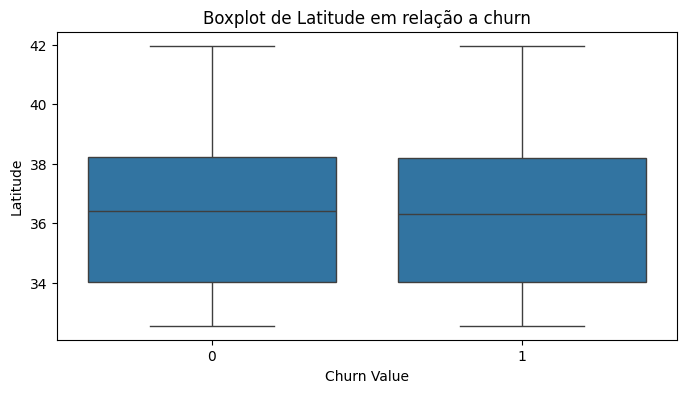

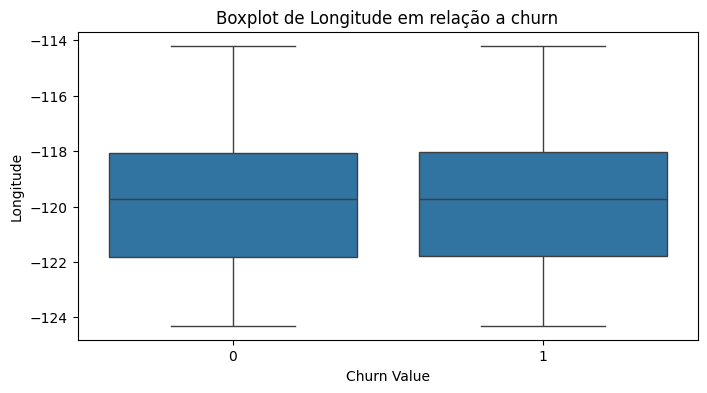

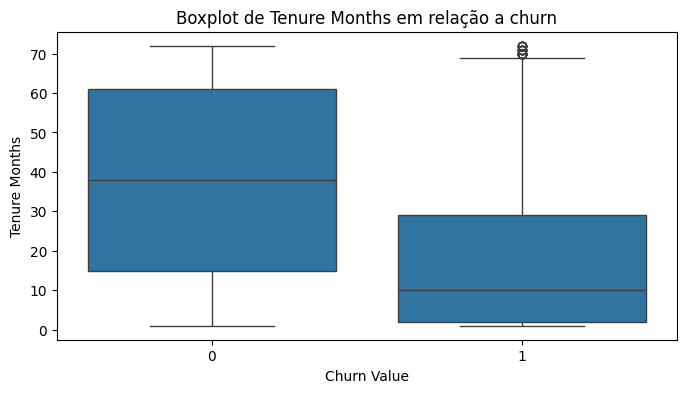

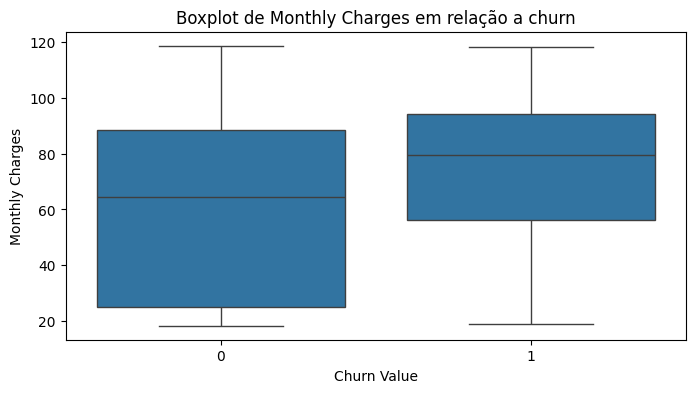

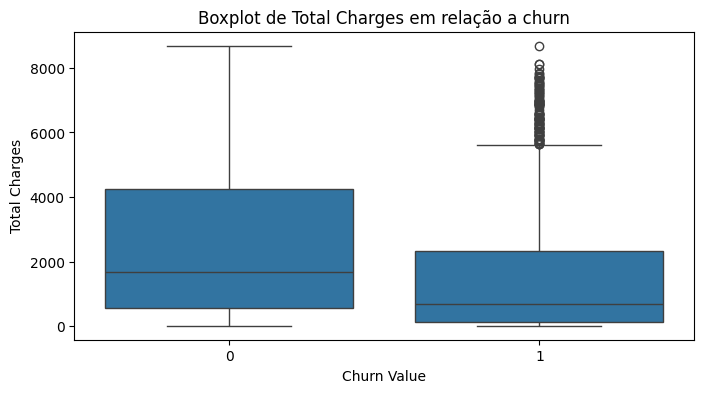

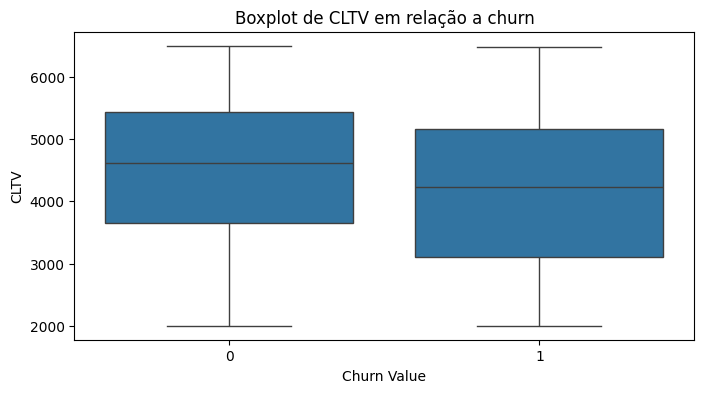

In [ ]:
#BOXPLOT 
for feature in colunas_numericas:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn Value', y=feature, data=df)
    plt.title(f'Boxplot of {feature} vs churn')
    plt.show()
    

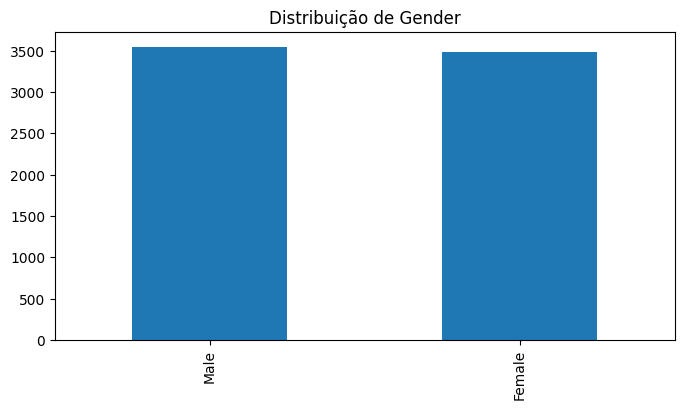

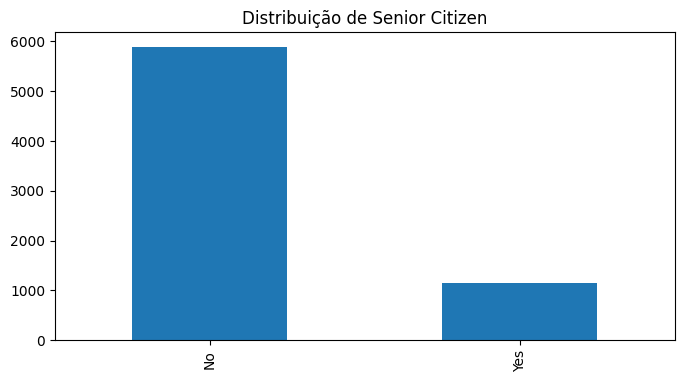

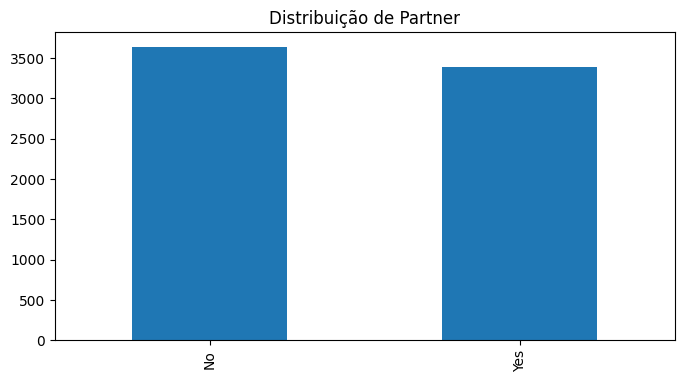

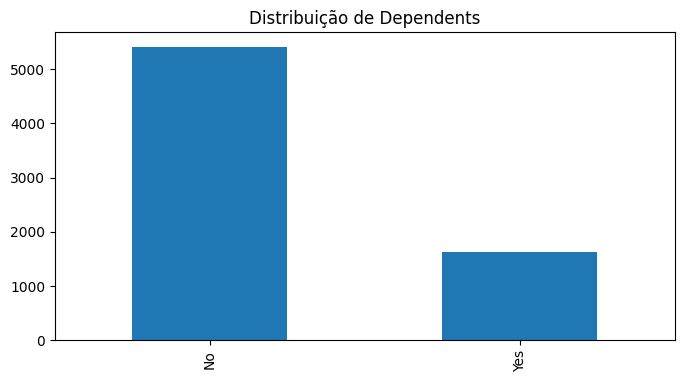

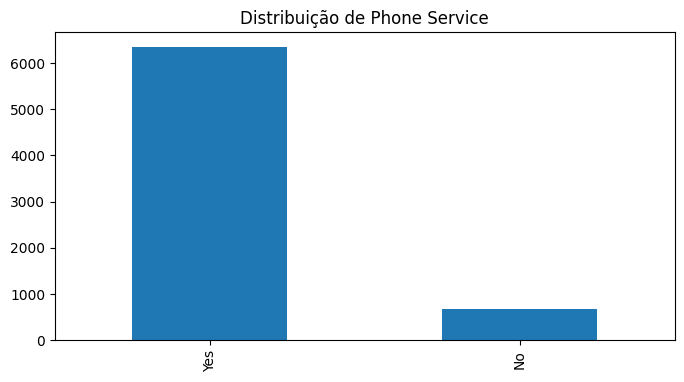

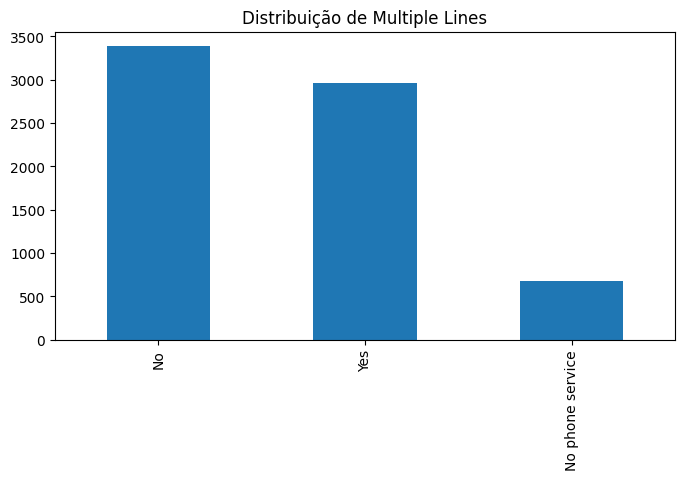

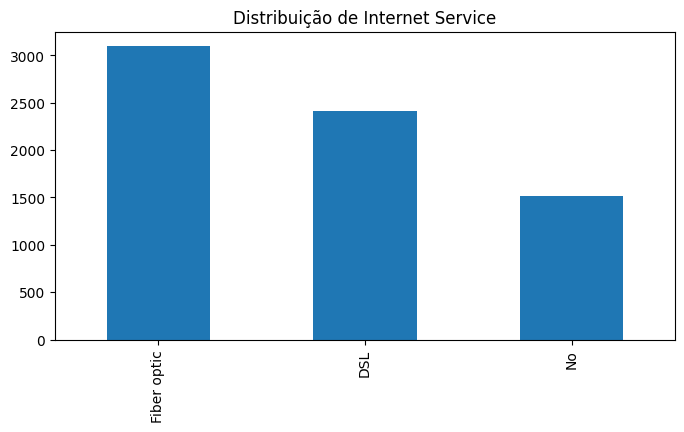

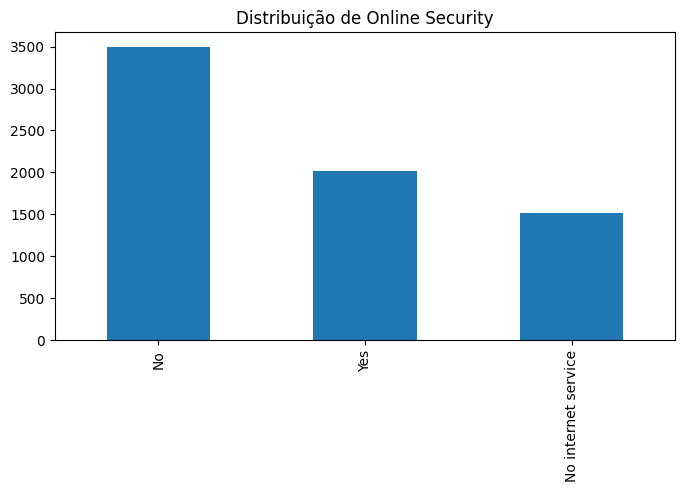

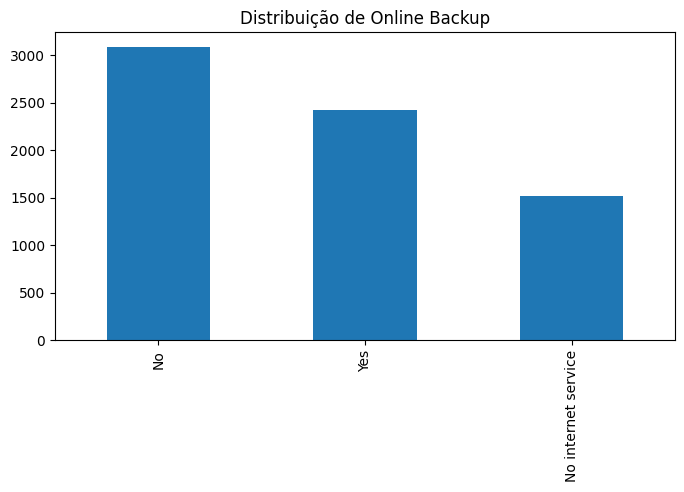

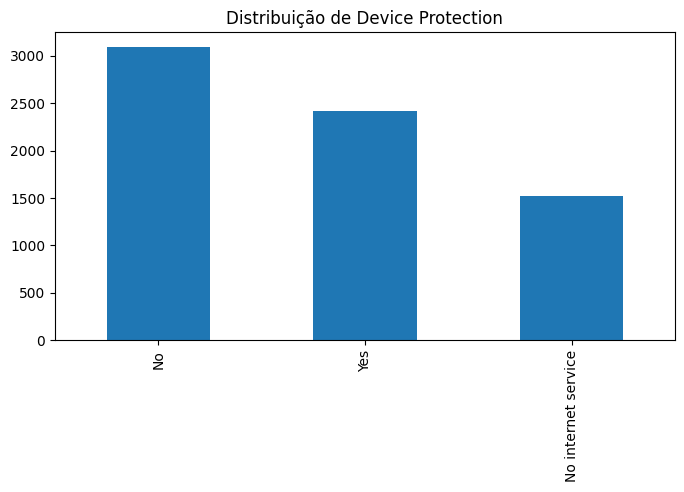

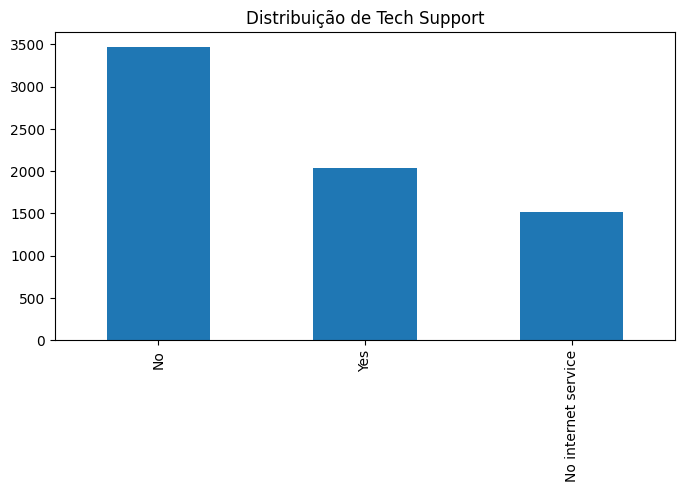

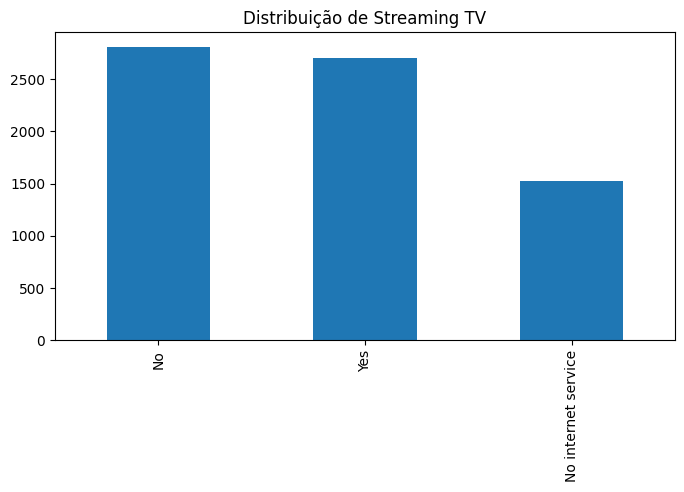

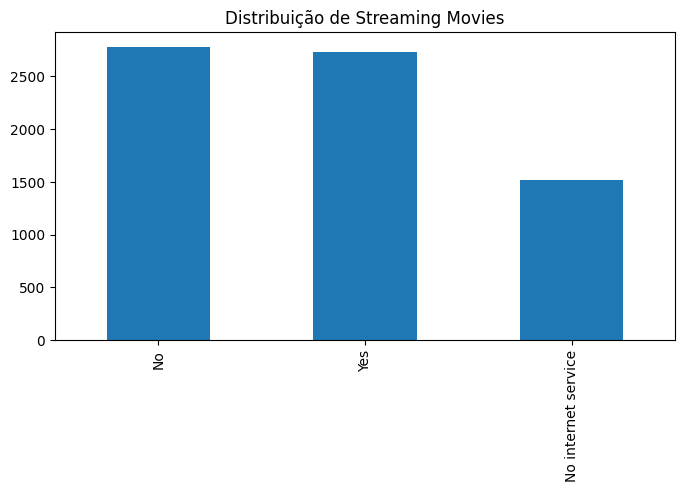

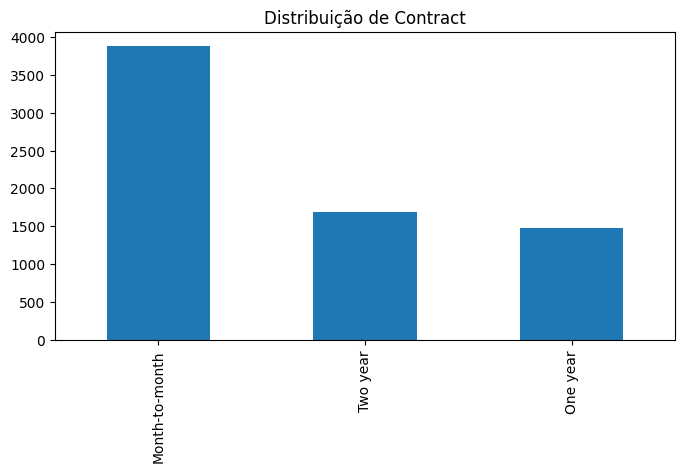

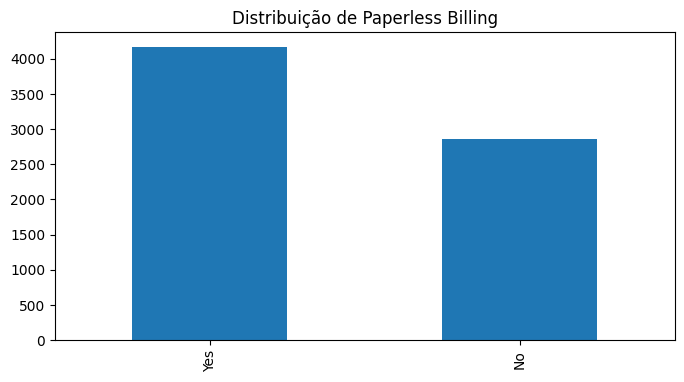

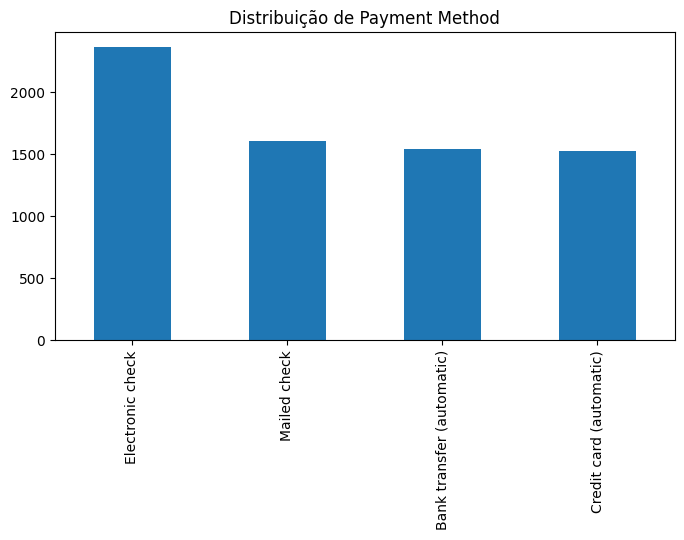

In [11]:
#Categorical Columns
for feature in colunas_categoricas:
        if feature != 'CustomerID':
            plt.figure(figsize=(8,4))
            df[feature].value_counts().plot(kind='bar')
            plt.title(f'Distribuição de {feature}')
            plt.show()

## DATA PREPARATION

In [12]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=2023)

In [13]:
preprocessamento_numerico = make_pipeline( SimpleImputer(strategy='mean'), MinMaxScaler())
preprocessamento_categorico = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='if_binary', handle_unknown='ignore',sparse_output=False))

preprocessamento = ColumnTransformer([
    ('categorical_pre',preprocessamento_categorico, colunas_categoricas),
    ('numerical_pre',preprocessamento_numerico, colunas_numericas)
])

preprocessamento

ColumnTransformer(transformers=[('categorical_pre',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['CustomerID', 'Gender', 'Senior Citizen',
                                  'Partner', 'Dependents', 'Phone Service',
                                  'Multiple Lines', 'Internet Service',
                                  'Online Security', 'Online Backup',
                                  'Device Protection', 'Tech Support',
                                  'Streaming TV', 'Streaming Movies',
                                  'Contract', 'Paperless Billing',
                                  'Payment Method']),
                                ('numerical_pre',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Latitude', 'Longitude', 'Tenure Months',
                                  'Monthly Charges', 'Total Charges',
                                  'CLTV'])])

## MODELING

In [14]:
#Criar um pipeline generico para um modelo que é um chute
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessamento),
    ('model', DummyClassifier())
])

model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical_pre',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['CustomerID', 'Gender',
                                                   'Senior Citizen', 'Partner',
                                                   'Dependents',
                                                   'Phone Service',
                                                   'Multiple Lines',
                                                   'Int...
                                                   'Online Security',
                                                   'Online Backup',
                                                   'Device Protection',
                                                   'Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Contract',
                                                   'Paperless Billing',
                                                   'Payment Method']),
                                                 ('numerical_pre',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'Tenure Months',
                                                   'Monthly Charges',
                                                   'Total Charges',
                                                   'CLTV'])])),
                ('model', DummyClassifier())])

In [15]:
#Primeiro passa os parametros dos modelos que você quer testar
params = {
    'model': [
        LogisticRegressionCV(),
        RandomForestClassifier(random_state=2023),
        GradientBoostingClassifier(random_state=2023),
        DummyClassifier()
    ] 
}

#Faz um gridsearchCV com os modelos que você está testando
grid = GridSearchCV(model_pipeline, params, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

df_grid_results = pd.DataFrame(grid.cv_results_).set_index('rank_test_score').sort_index()
df_grid_results.iloc[:,~df_grid_results.columns.str.contains('split|fit')]

Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Users\marti\anaconda3\envs\case_classification\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\marti\anaconda3\envs\case_classification\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

,mean_score_time,std_score_time,param_model,params,mean_test_score,std_test_score
rank_test_score,,,,,,
1,0.276258,0.021928,LogisticRegressionCV(),{'model': LogisticRegressionCV()},0.619609,0.004804
2,0.542342,0.053093,GradientBoostingClassifier(random_state=2023),{'model': GradientBoostingClassifier(random_st...,0.589759,0.003140
3,0.729330,0.032174,RandomForestClassifier(random_state=2023),{'model': RandomForestClassifier(random_state=...,0.556433,0.019916
4,0.677885,0.078311,DummyClassifier(),{'model': DummyClassifier()},0.000000,0.000000


O melhor modelo foi o modelo de LogisticRegressionCV, podemos tunar este modelo

In [22]:
model_pipeline= Pipeline(steps=[
    ('preprocessor',preprocessamento),
    ('model', LogisticRegression())
])

params= {
    'model__C': [0.001, 0.01, 0.1],
    'model__class_weight': ['balanced']
}

grid_model= GridSearchCV(model_pipeline, params, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_model.fit(X_train,y_train)

df_grid_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index()
df_grid_results.iloc[:,~df_grid_results.columns.str.contains('split|fit')]

Fitting 5 folds for each of 3 candidates, totalling 15 fits


,mean_score_time,std_score_time,param_model__C,param_model__class_weight,params,mean_test_score,std_test_score
rank_test_score,,,,,,,
1,0.374855,0.324038,0.1,balanced,"{'model__C': 0.1, 'model__class_weight': 'bala...",0.636662,0.013418
2,0.401366,0.076639,0.01,balanced,"{'model__C': 0.01, 'model__class_weight': 'bal...",0.628991,0.018251
3,0.561124,0.151039,0.001,balanced,"{'model__C': 0.001, 'model__class_weight': 'ba...",0.615206,0.010746


In [23]:
modelo = grid_model.best_estimator_

c:\Users\marti\anaconda3\envs\case_classification\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\marti\anaconda3\envs\case_classification\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Acurácia: 0.7704
Matriz de Confusão:
[[810 252]
 [ 71 274]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1062
           1       0.52      0.79      0.63       345

    accuracy                           0.77      1407
   macro avg       0.72      0.78      0.73      1407
weighted avg       0.82      0.77      0.78      1407



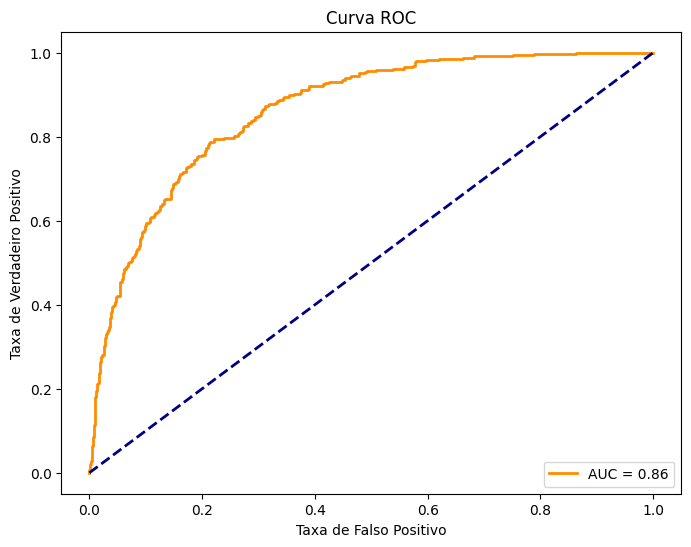

In [26]:
# Fazer previsões
y_pred = modelo.predict(X_test)

# Calcular a acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia:.4f}')

# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(matriz_confusao)

# Relatório de classificação
relatorio_classificacao = classification_report(y_test, y_pred)
print('Relatório de Classificação:')
print(relatorio_classificacao)

# Calcular a área sob a curva ROC (Receiver Operating Characteristic) e plotar a curva ROC
probabilidades = modelo.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva
roc_auc = roc_auc_score(y_test, probabilidades)

fpr, tpr, _ = roc_curve(y_test, probabilidades)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## DEPLOYMENT

In [28]:
with open('../models/modelo.pkl', 'wb') as arquivo_modelo:
    pickle.dump(modelo, arquivo_modelo)